# Topic Classification
#### By : Mikayla Pugel

#### In this project I classify newsgroup posts on a variety of topics into 1 of 4 different categories. I will complete this task by training classifiers to distinguish the text based on topics inferred from the text.

In [2]:
# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt
import nltk
%matplotlib inline

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

#### Below I used a dataset from the SK-learn library. I did not complete any EDA as I assumed the data was clean coming from the library. The categories are shown below as well as the separating of the data into groups that can be used in models. The data was split into test data, test label, train data, and train labels. 

In [3]:
#load in data
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test  = fetch_20newsgroups(subset='test',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)

num_test = int(len(newsgroups_test.target) / 2)
test_data, test_labels   = newsgroups_test.data[num_test:], newsgroups_test.target[num_test:]
dev_data, dev_labels     = newsgroups_test.data[:num_test], newsgroups_test.target[:num_test]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print('dev label shape:',      dev_labels.shape)
print('test label shape:',     test_labels.shape)
print('labels names:',         newsgroups_train.target_names)

training label shape: (2034,)
dev label shape: (676,)
test label shape: (677,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


#### I began first to just print out some examples and their corresponding label so better understand the examples. 

In [4]:
def P1(num_examples=5):
    
    #print out a number of examples in an organized fashion
    for i in range(num_examples):
        print("Train Data: ", train_data[i])
        print("Train Label:", train_labels[i])
        print("---------------------------------------------------------------------")

P1(5)

Train Data:  Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
Train Label: 1
---------------------------------------------------------------------
Train Data:  

Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been 

#### Next I transofrm the data in different ways, these ways inclue unigram/bigram/word/character. I am using CountVectorizer throughout this project to turn the text into numerical features that can be run through a machine learning model. This is completed by tokening, counting, and normalizing the text. 

- Matrix 1: Normal vectorized matrix of the text data
- Matrix 2: Data was vectorized only using the vocabulary given (4 topics)
- Matrix 3: Data was vectorized by analyzing character in 2-3 length increments
- Matrix 4: Vectorized on words that show up in more than 10 documents

In [11]:
def P2():
    
    #section1 - transform data into a matrix of word unigram feature vector
    vectorizer = CountVectorizer()
    matrix = vectorizer.fit_transform(train_data)
      
    #get feature names
    feature_names = vectorizer.get_feature_names()
    
# #     sorted_features = feature_names.sort()
# #     print(sorted_features)
#     #printing the first and last feature strings
#     print("0th feature string: " + feature_names[0])
#     print("The last feature string: " + feature_names[-1])
    
    shape_matrix = np.shape(matrix)
    print("The size of the vocabulary for matrix 1: " + str(np.shape(matrix)))
    average_zeros = matrix.nnz /shape_matrix[0] #divide by vocabulary size
#     print("The average number of non-zero features per example: " + str(average_zeros))
#     fraction_zeros = average_zeros / (shape_matrix[0]*shape_matrix[1])
#     print("The fraction of non-zero entities in the matrix: " + str(fraction_zeros))

    
    #section2 - transform data into a matrix of word unigram feature vector using own vocabulary
    vectorizer2 = CountVectorizer(vocabulary=["atheism", "graphics", "space", "religion"]) 
    matrix2 = vectorizer2.transform(train_data)
#     print(np.nonzero(matrix2))
    shape_matrix2 = np.shape(matrix2)
    print("The size of the vocabulary for matrix 2: " + str(np.shape(matrix2)))
#     average_zeros = matrix2.nnz /shape_matrix[0] #divide by vocabulary size
#     print("The average number of non-zero features per example in matrix 2: " + str(average_zeros))


    #section3 - transform data into a matrix of character bigram and trigram feature vectors
    vectorizer3 = CountVectorizer(analyzer='char', ngram_range=(2,3))
    matrix3 = vectorizer3.fit_transform(train_data)
    print("The size of the vocabulary for matrix 3: " + str(np.shape(matrix3)))
    
    #section4 - transform the training data into a matrix of word unigram feature 
    #vectors and prune words that appear in fewer than 10 documents
    vectorizer4 = CountVectorizer(min_df=10)
    matrix4 = vectorizer4.fit_transform(train_data)
    print("The size of the vocabulary for matrix 4: " + str(np.shape(matrix4)))
    
    #section5 - transform the training data into a matrix of word unigram feature vectors
#     vectorizer5 = CountVectorizer() 
    
#     #build vocabulary for both train and dev
#     matrix5 = vectorizer5.fit_transform(train_data)
#     matrix6 = vectorizer5.fit_transform(dev_data)
    
#     size_train = np.shape(matrix5)
#     size_dev = np.shape(matrix6)
    
#     #compare sizes of train and dev data
#     fraction = 1 - (size_dev[1] / size_train[1])
#     print("Fraction of dev data not in training vocabulary: " + str(fraction))
    

P2()

The size of the vocabulary for matrix 1: (2034, 26879)
The size of the vocabulary for matrix 2: (2034, 4)
The size of the vocabulary for matrix 3: (2034, 35478)
The size of the vocabulary for matrix 4: (2034, 3064)


#### Here I have trained and optimized three different models. 
- Model 1: K-Nearest Neighbors
- Model 2: Naive-Bayes
- Model 3: Logistic Regression

In [12]:
def P3():

    k = [1,2,3,4,5,6,7,8,9,10,20]
    a = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 1]
    c = [0.1, 0.2, 0.3,0.4, 0.5,0.6, 0.7,1,5, 10,50]
    
    #set up vectorizer and transform the data
    vectorizer = CountVectorizer()
    matrix_train = vectorizer.fit_transform(train_data)
    matrix_dev = vectorizer.transform(dev_data)
    
    #vary k values for KNN model
    for i in k:
        model1 = KNeighborsClassifier(n_neighbors = i)
        model1.fit(matrix_train, train_labels)
        predictions1 = model1.predict(matrix_dev)
        print("K-VALUE:", i, end='')
        print(" f1 score: ", metrics.f1_score(dev_labels, predictions1, average="weighted"))
    
    #varying smoothing for NB model
    for j in a:
        model2 = MultinomialNB(alpha = j)
        model2.fit(matrix_train, train_labels)
        predictions2 = model2.predict(matrix_dev)
        print("ALPHA:", j, end='')
        print(" f1 score: ", metrics.f1_score(dev_labels, predictions2, average="weighted"))
        
    #vary regularization strength for logistic regression
    for l in c:
        model3 = LogisticRegression(C=l, solver="liblinear", multi_class="auto")
        model3.fit(matrix_train, train_labels)
        predictions3 = model3.predict(matrix_dev)
        print("C:", l, end='')
        print(" f1 score: ", metrics.f1_score(dev_labels, predictions3, average="weighted"))
        weights = model3.coef_
        total_sum = 0
        for w in weights:
            for r in w:
                total_sum += (r**2)
        print("Sum of Squared Weights: ", total_sum)
    
    print("Optimized K-Value: 7")
    print("Optimized Alpha: 0.1")
    print("Optimized C: 0.3")
    


P3()

K-VALUE: 1 f1 score:  0.3805030018531525
K-VALUE: 2 f1 score:  0.38054212404441684
K-VALUE: 3 f1 score:  0.4084150225437623
K-VALUE: 4 f1 score:  0.4031227993847515
K-VALUE: 5 f1 score:  0.4287607236218357
K-VALUE: 6 f1 score:  0.4466650540867595
K-VALUE: 7 f1 score:  0.45047910006117586
K-VALUE: 8 f1 score:  0.44698358117081094
K-VALUE: 9 f1 score:  0.4365666176198027
K-VALUE: 10 f1 score:  0.4278502905941064
K-VALUE: 20 f1 score:  0.4243419588207676
ALPHA: 1e-05 f1 score:  0.7533492167780379
ALPHA: 0.0001 f1 score:  0.7628348704826354
ALPHA: 0.001 f1 score:  0.7702518836155706
ALPHA: 0.01 f1 score:  0.7751663218544357
ALPHA: 0.1 f1 score:  0.7903052385098862
ALPHA: 0.2 f1 score:  0.7876298330892171
ALPHA: 0.5 f1 score:  0.7862862961995258
ALPHA: 1 f1 score:  0.7777320236017224
C: 0.1 f1 score:  0.6966243542418833
Sum of Squared Weights:  102.26373601483208
C: 0.2 f1 score:  0.7058733693981117
Sum of Squared Weights:  184.49880873749936
C: 0.3 f1 score:  0.7100848889111422
Sum of Squa

#### Now I want to analyze based on word bigrams for each topics. Below I show the top 5 feature word bigrams for each topic. I complete this by transforming the data, fitting a logisitic regression, and then sorting and indexing the feature names with their corresponding coefficient for each topic. 

In [7]:
def P4():
    
    #tranform data
    vectorizer = CountVectorizer(ngram_range=(2, 2))
    matrix_train = vectorizer.fit_transform(train_data)
    matrix_feature_names = vectorizer.get_feature_names()
    
    #train model
    model = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")
    model.fit(matrix_train, train_labels)
    
    #gather weights and sort weights for the largest 5 
    weights = model.coef_
    sorted_values = np.argsort(weights, axis=1)[:,-5:]
    
    #find the feature name that corresponds to the largest weights
    #do this by indexing on the feature names based on the weights index
    feature_names =[]
    for i in range(4):
        for j in range(5):
            feature_names.append(matrix_feature_names[sorted_values[i][j]])
    feature_array = np.array(feature_names)
    
    #print the feature names for the matrix 
    feature_names = ["Feature", "Atheism", "Graphics", "Space", "Religion"]
    print(feature_names)
    
    #print out the weights for each feature and topic in a matrix
    for feature in feature_array:
        full_array = []
        #find index for feature name
        index = matrix_feature_names.index(feature)
#         print(feature, end=' ')
        full_array.append(feature)
        for k in range(4):
#             if k == 3:
#                 #print the weight in the same row as the feature and for each of the topic
# #                   print(weights[k][index])  
#             else:
#                 print(weights[k][index], end=' ')
            full_array.append(round(weights[k][index], 4))
        print(full_array)
    
#     full_array = np.array(full_array)
#     full_array = np.reshape(full_array, (5,20))
            

#     print(feature_names)
#     for y in full_array:
#         for z in y:
#             print(z, end=" ")


P4()

['Feature', 'Atheism', 'Graphics', 'Space', 'Religion']
['are you', 0.447, -0.2483, -0.0972, -0.3056]
['you are', 0.4727, -0.2799, -0.4814, 0.0284]
['was just', 0.4821, -0.1314, -0.1289, -0.2275]
['cheers kent', 0.5557, -0.6979, -0.6638, 0.5348]
['claim that', 0.6056, -0.199, -0.2744, -0.1404]
['is there', -0.3409, 0.755, -0.4683, -0.2571]
['out there', -0.2748, 0.7587, -0.479, -0.2771]
['comp graphics', -0.2922, 0.8012, -0.3709, -0.2852]
['in advance', -0.4594, 0.8326, -0.4385, -0.4185]
['looking for', -0.6303, 1.1084, -0.4999, -0.5719]
['it was', -0.203, -0.3097, 0.5254, -0.3136]
['and such', -0.2043, -0.3375, 0.5906, -0.2182]
['sci space', -0.258, -0.3291, 0.6211, -0.2212]
['the moon', -0.3506, -0.4927, 0.8312, -0.2138]
['the space', -0.2682, -0.5301, 0.8712, -0.2738]
['of jesus', -0.0919, -0.1738, -0.2124, 0.4238]
['but he', -0.19, -0.2169, -0.1374, 0.4919]
['ignorance is', -0.158, -0.1711, -0.1396, 0.5043]
['cheers kent', 0.5557, -0.6979, -0.6638, 0.5348]
['the fbi', -0.132, -0.21

regularization strenght: 0.1
F1 score l1: 0.637221813825226
size of new_vocab: 216
F1 score l2: 0.16520541684706788
---------------------
regularization strenght: 0.2
F1 score l1: 0.6934667818378822
size of new_vocab: 366
F1 score l2: 0.1663883620628695
---------------------
regularization strenght: 0.3
F1 score l1: 0.688753258723191
size of new_vocab: 532
F1 score l2: 0.17650136922656884
---------------------
regularization strenght: 0.4
F1 score l1: 0.6858725408990103
size of new_vocab: 642
F1 score l2: 0.2002172114476057
---------------------
regularization strenght: 0.5
F1 score l1: 0.6839391934405558
size of new_vocab: 758
F1 score l2: 0.19430789719285305
---------------------
regularization strenght: 0.6
F1 score l1: 0.6891784988700599
size of new_vocab: 915
F1 score l2: 0.18711085815201978
---------------------
regularization strenght: 0.7
F1 score l1: 0.6968210964328674
size of new_vocab: 949
F1 score l2: 0.19236680478727033
---------------------
regularization strenght: 0.8
F1

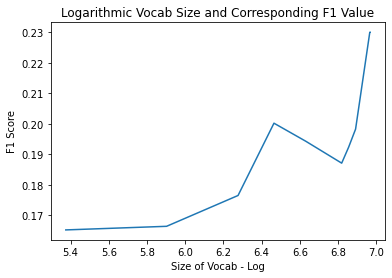

In [8]:
def P6():
    # Keep this random seed here to make comparison easier.
#     np.random.seed(0)

    
    #train vectorizer and data
    vectorizer = CountVectorizer()
    trans_train = vectorizer.fit_transform(train_data)
    trans_dev = vectorizer.transform(dev_data)
    
    c = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
    
    vocab_values_graph = []
    f1_values_graph = []
    
    for k in c:
        # fit model for each regularization strength
        print("regularization strenght: " + str(k))
        model = LogisticRegression(C=k, solver="liblinear", multi_class="auto", penalty="l1", tol=0.015)
        model.fit(trans_train, train_labels)
        y_pred = model.predict(trans_dev)

        #get weights and features
        weights = model.coef_
        feature_names = vectorizer.get_feature_names()

#         print(np.shape(weights))
#         print(np.shape(feature_names))
        
        #print f1 score
        print("F1 score l1: " + str(metrics.f1_score(dev_labels, y_pred, average="weighted")))
        
    #     shape_matrix = np.shape(trans_train)
    #     print(shape_matrix)
        
#         print(np.count_nonzero(weights, axis = 0))
#         print(np.shape((np.count_nonzero(weights, axis = 0))))
        
        # find all the rows that have at least 1 nonzero weight and then append those to the new_vocab list
        new_vocab = []
        count = 0
        for i in np.count_nonzero(weights, axis = 0):
            if i > 0:
                new_vocab.append(feature_names[count])
                count += 1
        
        #print size of new vocab and append it to the list for graphing later
        print("size of new_vocab: " + str(len(new_vocab)))
        vocab_values_graph.append(len(new_vocab))
        
        #tranform data based on new vocab
        vectorizer2 = CountVectorizer(vocabulary=new_vocab)
        trans_train2 = vectorizer2.fit_transform(train_data)
        trans_dev2 = vectorizer2.transform(dev_data)
        
        #train model on new data
        model2 = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto", penalty="l2", tol=0.015)
        model2.fit(trans_train2, train_labels)
        y_pred2 = model2.predict(trans_dev2)
        
        #print f1 score and add it to the list for graphing later
        print("F1 score l2:", metrics.f1_score(dev_labels, y_pred2, average="weighted"))
        f1_values_graph.append(metrics.f1_score(dev_labels, y_pred2, average="weighted"))
        
        print("---------------------")
    
    #plot the log of the vocab length values vs the f1 values from model2
    plt.plot(np.log(vocab_values_graph), f1_values_graph)
    plt.ylabel("F1 Score")
    plt.xlabel("Size of Vocab - Log")
    plt.title("Logarithmic Vocab Size and Corresponding F1 Value")


P6()

In [9]:
def P7():
    #transform data
    vectorizer = TfidfVectorizer()
    trans_train = vectorizer.fit_transform(train_data)
    trans_dev = vectorizer.transform(dev_data)
    
    #fit model and find the probabilities 
    model = LogisticRegression(C=100, solver="liblinear", multi_class="auto", penalty="l2")
    model.fit(trans_train, train_labels)
    y_pred = model.predict(trans_dev)
    y_pred_probs = model.predict_proba(trans_dev)
#     print(np.shape(y_pred_probs))
    
    #create a list of maximum probabilities from each row
    count = 0
    max_probs_per_row = []
    for i in y_pred_probs:
        max_prob = np.max(i)
        max_probs_per_row.append(max_prob)
        
#     print(np.shape(max_probs_per_row))
        
    #create a list of probabilities of the correct label in each row
    correct_label_prob = []
    for i in range(len(y_pred_probs)):
        correct_label_prob.append(y_pred_probs[i][dev_labels[i]])
        
#     print(np.shape(correct_label_prob))
    
    #divide the two lists created above and add them to a new list of r ratios
    r_ratios = []
    for i in range(len(correct_label_prob)):
        if correct_label_prob[i] != 0:
            r_ratios.append(max_probs_per_row[i] / correct_label_prob[i])
        else:
            r_ratios.append(0)
    
#     print(np.shape(r_ratios))
    
    #select top three r ratio values from r ratio list and print the corresponding data and label
    top_three = np.argsort(r_ratios)[:3]
    for k in top_three:
        print(dev_data[k])
        print(dev_labels[k])
        print("---------------------------------------------------------------")
    
    print("F1 score: " + str(metrics.f1_score(dev_labels, y_pred, average="weighted")))
    


P7()

TRry the SKywatch project in  Arizona.
2
---------------------------------------------------------------

They can be detached in an emergency.  But expensive hardware is not thrown
away casually (bearing in mind that nobody knew the design was defective).
If the deployment crew had found some nasty flaw -- the lid failing to open,
for example -- it would have been a bit embarrassing to have to throw the
solar arrays away to get the thing back in the payload bay.
2
---------------------------------------------------------------
The tongue that brings healing is a
	tree of life,
	but a deceitful tongue crushes the
	spirit.
3
---------------------------------------------------------------
F1 score: 0.7597662427853104
